In [56]:
import opendatasets as od
import pandas as pd
import numpy as np

In [35]:
od.download('https://www.kaggle.com/competitions/nlp-getting-started/data')

100%|████████████████████████████████████████████████████| 593k/593k [00:01<00:00, 466kB/s]


Extracting archive .\nlp-getting-started/nlp-getting-started.zip to .\nlp-getting-started


# Importing files

In [39]:
sample=pd.read_csv("nlp-getting-started/sample_submission.csv")
train=pd.read_csv('nlp-getting-started/train.csv')
test=pd.read_csv('nlp-getting-started/test.csv')

In [37]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [40]:
print(train.head())
print(test.head())
test_id=test['id']
print(train.shape)
print(test.shape)
print(test_id.shape)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
(7613, 5)
(3263, 4)
(

In [41]:
x_train=train['text']
y_train=train['target']
test_df=test['text']
print(x_train.head())
print(y_train.head())
print(test_df.head())
print(x_train.shape)
print(y_train.shape)
print(test_df.shape)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object
(7613,)
(7613,)
(3263,)


In [43]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\ANIKET VISHWAKARMA\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



                                              0.0/1.5 MB ? eta -:--:--
     ---                                      0.1/1.5 MB 2.4 MB/s eta 0:00:01
     --------                                 0.3/1.5 MB 3.3 MB/s eta 0:00:01
     ---------------                          0.6/1.5 MB 4.7 MB/s eta 0:00:01
     -------------------------------          1.2/1.5 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 6.9 MB/s eta 0:00:00
                                              0.0/268.0 kB ? eta -:--:--
     ------------------------------------- 268.0/268.0 kB 16.1 MB/s eta 0:00:00


# Cleaning train data

In [49]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (you only need to run this once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\ANIKET
[nltk_data]     VISHWAKARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ANIKET
[nltk_data]     VISHWAKARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
clean_train=[]
for i in range(len(x_train)):
    text=re.sub('[^a-zA-Z]', ' ', x_train[i])
    text=text.lower()
    text=word_tokenize(text)
    ps=PorterStemmer()
    text=[ps.stem(t) for t in text if not t in set(stopwords.words('english'))]
    text=' '.join(text)
    clean_train.append(text)

In [52]:
print(clean_train[0:5])

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school']


# Cleaning test data

In [53]:
clean_test=[]
for i in range(len(test_df)):
    text=re.sub('[^a-zA-Z]', ' ', test_df[i])
    text=text.lower()
    text=word_tokenize(text)
    ps=PorterStemmer()
    text=[ps.stem(t) for t in text if not t in stopwords.words('english')]
    text=' '.join(text)
    clean_test.append(text)

In [54]:
print(clean_test[0:5])

['happen terribl car crash', 'heard earthquak differ citi stay safe everyon', 'forest fire spot pond gees flee across street save', 'apocalyps light spokan wildfir', 'typhoon soudelor kill china taiwan']


# Combining clean_train And clean_test

In [57]:
combine = np.concatenate((clean_train, clean_test))
print(combine[0:5])
print(combine.shape)

['deed reason earthquak may allah forgiv us'
 'forest fire near la rong sask canada'
 'resid ask shelter place notifi offic evacu shelter place order expect'
 'peopl receiv wildfir evacu order california'
 'got sent photo rubi alaska smoke wildfir pour school']
(10876,)


# creating bag-of-words model

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(combine)

print(len(cv.get_feature_names_out()))

24460


In [59]:
combine_data=X.toarray()

print(combine_data)
print(combine_data.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10876, 24460)


In [60]:
xtrain=combine_data[0:7613]
print(xtrain.shape)
print(y_train.shape)

(7613, 24460)
(7613,)


In [61]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
xt, xtt, yt, ytt=train_test_split(xtrain, y_train, test_size=0.33, random_state=42)

In [62]:
print(xt.shape, xtt.shape, yt.shape, ytt.shape)

(5100, 24460) (2513, 24460) (5100,) (2513,)


# SVM

In [63]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1, gamma='auto')
model.fit(xt, yt)
ypred=model.predict(xtt)
print(ypred)

[0 0 0 ... 1 0 0]


In [65]:
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7799442896935933


# Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xt, yt)

LogisticRegression()

In [81]:
ypred=lr.predict(xtt)
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7978511738957421


In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
cm=confusion_matrix(ytt, ypred)
print(cm)

[[1271  175]
 [ 333  734]]


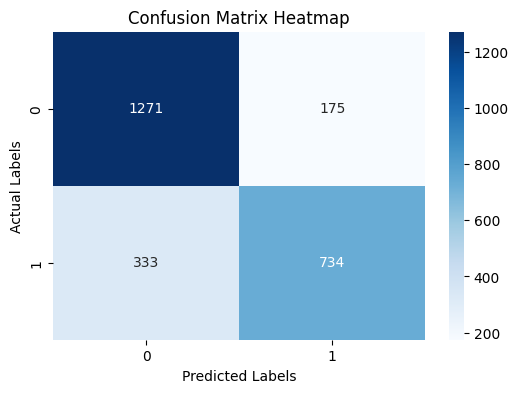

In [84]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Guassian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xt, yt)

GaussianNB()

In [68]:
ypred=gnb.predict(xtt)
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.6032630322323915


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(xt, yt)

RandomForestClassifier(n_estimators=50)

In [70]:
ypred=rf.predict(xtt)
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7926780740151214


In [ ]:
ypred=xgb.predict(xtt)
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xt, yt)

KNeighborsClassifier()

In [74]:
ypred=knn.predict(xtt)
accuracy = accuracy_score(ytt, ypred)
print("Accuracy:", accuracy)


Accuracy: 0.6657381615598886
